Hello

In [1]:
#!/user/local/bin/python2
import matplotlib.pyplot as plt
import numpy as np
import essentia.standard
import librosa.display
import librosa

#Load Audio
loader = essentia.standard.MonoLoader(filename="beltram/clip2.mp3")
audio = loader()

In [2]:
#Get onsets
onsetTimes = None

onsetRate = essentia.standard.OnsetRate()
onsetTimes, onsetRate = onsetRate(audio)

#Get Beats
beatTracker = essentia.standard.BeatTrackerMultiFeature()
beats, confidence = beatTracker(audio)

In [3]:
#Get Spectrogram
w = essentia.standard.Windowing(type = 'hann')
spectrum = essentia.standard.Spectrum()  # FFT() would return the complex FFT, here we just want the magnitude spectrum
mfcc = essentia.standard.MFCC()
mfccs = []
specs = []

for frame in essentia.standard.FrameGenerator(audio, frameSize = 512, hopSize = 256):
    spec = spectrum(w(frame))
    specs.append(spec)
#     mfcc_bands, mfcc_coeffs = mfcc(spec)
#     mfccs.append(mfcc_coeffs)

# transpose to have it in a better shape
# we need to convert the list to an essentia.array first (== numpy.array of floats)
mfccs = essentia.array(mfccs).T
specs = essentia.array(specs).T

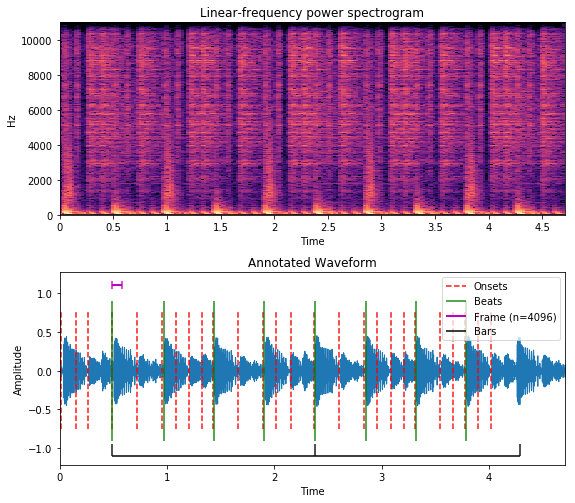

In [8]:
y, sr = librosa.load("beltram/clip3.mp3")

#PLOT WAVEFORM
##############
# fontsize=15
plt.figure(figsize=(8.1, 7.1))

plt.subplot(2,1,2)

librosa.display.waveplot(y)

plt.ylabel("Amplitude")

plt.vlines(onsetTimes, -0.75, 0.75, color='r', alpha=0.9,
           linestyle='--', label='Onsets')

plt.vlines(beats, -0.9, 0.9, color='g', alpha=0.9,
           linestyle='-', label='Beats')

#Draw frames
frameX = beats[0]
frameY = frameX + 0.092
line = plt.hlines(1.1, frameX, frameY, label='Frame (n=4096)', linestyle='-', color='m', linewidth=2.0)
plt.vlines(frameX, 1.15, 1.05, alpha=0.9, color='m')
plt.vlines(frameY, 1.15, 1.05, alpha=0.9, color='m')

#Draw bar boundaries

line = plt.hlines(-1.1, beats[0], beats[2], label='Bars', linestyle='-')
line = plt.hlines(-1.1, beats[2], 4.29, linestyle='-')

plt.vlines([beats[0], beats[4], 4.29], -1.1, -0.95, alpha=0.9)

#     plt.axis('tight')
plt.legend(frameon=True, framealpha=0.75)

# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=fontsize)
# plt.legend(loc='center left', fontsize=fontsize)

plt.title('Annotated Waveform')

#PLOT SPECTROGRAM
##############

plt.subplot(2,1,1)


D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
librosa.display.specshow(D, x_axis='time', y_axis='linear', sr=sr)
# # plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
line = plt.hlines(y=0, xmin=0, xmax=10, label='Bars', linestyle='-')


# fftSize = 1024
# onsetTimes = onsetTimes * 44100.0/fftSize
# print onsetTimes
# beats = beats * 44100.0/fftSize

# plt.vlines(onsetTimes, 0, 10000, color='r', alpha=0.9,
#            linestyle='--', label='Onsets')

# plt.vlines(beats, 0, 10000, color='g', alpha=0.9,
#            linestyle='-', label='Beats')

# #Draw bar boundaries

# line = plt.hlines(-1.1, beats[0], beats[2], label='Bars', linestyle='-')
# line = plt.hlines(-1.1, beats[2], onsetTimes[-1], linestyle='-')
# plt.vlines([beats[0], beats[4], onsetTimes[-1]], -1.1, -0.95, alpha=0.9)

# #     plt.axis('tight')
# plt.legend(frameon=True, framealpha=0.75)

# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#Save image without whitespace
plt.tight_layout()
plt.savefig("unit_plot.pdf", bbox_inches='tight', dpi=1200)
plt.show()